In [1]:
import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

nontrain_func = lambda x: torch.cat([torch.ones((x.shape[0], 1)), x], dim=1)

config_file = "paramkoopman100-100.json"
param_solver1 = pkdl.ParamKoopmanDLSolverWrapper(config_file)
param_solver1.setup(nontrain_func)
param_K1 = param_solver1.solve()

# config_file = "EDMD-RBF.json"
# edmd_solver1 = pkdl.ParamKoopmanDLSolverWrapper(config_file)
# edmd_solver1.setup(nontrain_func)
# edmd_K1 = edmd_solver1.solve()

config_file = "paramkoopman500-20.json"
param_solver2 = pkdl.ParamKoopmanDLSolverWrapper(config_file)
param_solver2.setup(nontrain_func)
param_K2 = param_solver2.solve()

config_file = "paramkoopman1000-10.json"
param_solver3 = pkdl.ParamKoopmanDLSolverWrapper(config_file)
param_solver3.setup(nontrain_func)
param_K3 = param_solver3.solve()

CUDA is available. GPU is being used.


Training: 100%|██████████| 50/50 [06:24<00:00,  7.70s/it, train_loss=4.13e-06, val_loss=1.48e-06]


## Plot

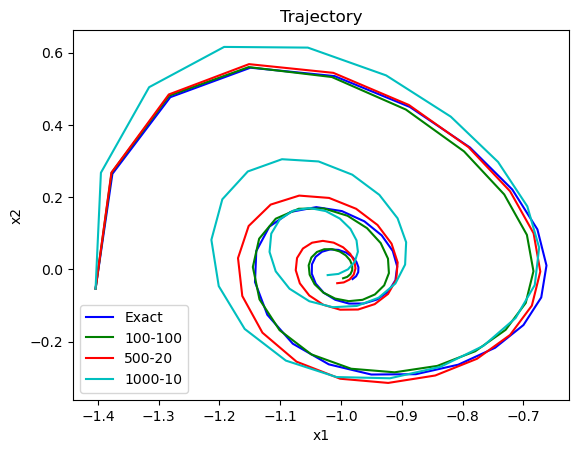

In [2]:
param = torch.tensor([[0.5, -1.0, 1.0]]).detach()
ode = param_solver1.ode
flowmap = param_solver1.flowmap
x_min = param_solver1.x_min
x_max = param_solver1.x_max
traj_len = param_solver1.traj_len
dim_nontrain = param_solver1.dim_nontrain
state_pos = [1,2]


dataset_predict = pkdl.ODEDataSet(ode, flowmap)
dataset_predict.generate_data(1, traj_len, x_min, x_max, param)
x_traj = dataset_predict.data_x
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
param_p1 = param_K1.predict(param, x0, param_solver1.dictionary, state_pos, dim_nontrain, traj_len).detach()
param_x_est_traj1 = param_p1[0, :, :]
param_p2 = param_K2.predict(param, x0, param_solver2.dictionary, state_pos, dim_nontrain, traj_len).detach()
param_x_est_traj2 = param_p2[0, :, :]
param_p3 = param_K3.predict(param, x0, param_solver3.dictionary, state_pos, dim_nontrain, traj_len).detach()
param_x_est_traj3 = param_p3[0, :, :]
# edmd_p1 = edmd_K1.predict(x0, edmd_solver1.dictionary, state_pos, dim_nontrain, traj_len).detach()
# edmd_x_est_traj1 = edmd_p1[0, :, :]

plt.plot(x_traj[:, 0], x_traj[:, 1], linestyle='-', color='b', label='Exact')
plt.plot(param_x_est_traj1[:, 1], param_x_est_traj1[:, 2], linestyle='-', color='g', label='100-100')
plt.plot(param_x_est_traj2[:, 1], param_x_est_traj2[:, 2], linestyle='-', color='r', label='500-20')
plt.plot(param_x_est_traj3[:, 1], param_x_est_traj3[:, 2], linestyle='-', color='c', label='1000-10')
# plt.plot(edmd_x_est_traj1[:, 1], edmd_x_est_traj1[:, 2], linestyle='-', color='yellow', label='edmd')


plt.title('Trajectory')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()